# 股票数据获取

本notebook演示如何从Yahoo Finance获取股票数据，并进行基本的数据处理。

**注意**: 由于Yahoo Finance API限流，本notebook使用已创建的示例数据。

## 1. 导入必要的库

In [1]:
import sys
import os

notebook_dir = os.getcwd()
project_dir = os.path.dirname(notebook_dir)
if project_dir not in sys.path:
    sys.path.insert(0, project_dir)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.data_loader import (
    load_stock_data,
    download_stock_data,
    get_stock_info,
    validate_data,
    clean_data
)

from src.visualization import plot_price_trend, setup_chinese_font

setup_chinese_font()
print("库导入成功！")
print(f"项目目录: {project_dir}")

库导入成功！
项目目录: /Users/fang/Documents/Code/python-demo/stock-analysis


## 2. 检查数据文件

In [2]:
data_dir = os.path.join(project_dir, 'data')

if os.path.exists(data_dir):
    files = [f for f in os.listdir(data_dir) if f.endswith('.csv')]
    print(f"数据目录: {data_dir}")
    print(f"找到 {len(files)} 个数据文件:")
    for file in sorted(files):
        print(f"  - {file}")
else:
    print(f"数据目录不存在: {data_dir}")
    print("提示: 请先运行 'python create_sample_data.py' 创建示例数据")

数据目录: /Users/fang/Documents/Code/python-demo/stock-analysis/data
找到 6 个数据文件:
  - AAPL_stock_data.csv
  - AAPL_stock_data_cleaned.csv
  - AMZN_stock_data.csv
  - GOOGL_stock_data.csv
  - MSFT_stock_data.csv
  - TSLA_stock_data.csv


## 3. 加载股票数据

In [3]:
ticker = 'AAPL'
file_path = os.path.join(project_dir, 'data', f'{ticker}_stock_data.csv')

if os.path.exists(file_path):
    data = load_stock_data(
        file_path=file_path,
        ticker=ticker
    )
    
    print(f"数据加载完成！")
    print(f"数据行数: {len(data)}")
    print(f"数据列数: {len(data.columns)}")
    print(f"\n数据预览:")
    data.head()
else:
    print(f"数据文件不存在: {file_path}")
    print("提示: 请先运行 'python create_sample_data.py' 创建示例数据")

从本地文件加载数据: /Users/fang/Documents/Code/python-demo/stock-analysis/data/AAPL_stock_data.csv
数据加载完成！
数据行数: 1304
数据列数: 6

数据预览:


## 4. 数据验证

In [4]:
if 'data' in locals():
    is_valid = validate_data(data)
    print(f"数据有效性: {'✓ 有效' if is_valid else '✗ 无效'}")
    
    print(f"\n缺失值统计:")
    print(data.isnull().sum())

数据有效性: ✓ 有效

缺失值统计:
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## 5. 数据清理

In [5]:
if 'data' in locals():
    if data.isnull().sum().sum() > 0:
        print("发现缺失值，进行清理...")
        data = clean_data(data)
        print("清理完成！")
    else:
        print("数据完整，无需清理")

数据完整，无需清理


## 6. 数据基本信息

In [6]:
if 'data' in locals():
    print("数据基本信息:")
    print(f"开始日期: {data.index[0].strftime('%Y-%m-%d')}")
    print(f"结束日期: {data.index[-1].strftime('%Y-%m-%d')}")
    print(f"数据天数: {len(data)}")
    
    print(f"\n价格统计:")
    print(data['Close'].describe())

数据基本信息:
开始日期: 2021-01-04
结束日期: 2026-01-01
数据天数: 1304

价格统计:
count    1304.000000
mean      351.870552
std        35.898796
min       260.980000
25%       327.087500
50%       355.185000
75%       378.610000
max       462.550000
Name: Close, dtype: float64


## 7. 计算日收益率

In [7]:
if 'data' in locals():
    data['Daily_Change_Pct'] = data['Close'].pct_change() * 100
    
    print("日收益率统计:")
    print(data['Daily_Change_Pct'].describe())
    
    print(f"\n最大单日涨幅: {data['Daily_Change_Pct'].max():.2f}%")
    print(f"最大单日跌幅: {data['Daily_Change_Pct'].min():.2f}%")

日收益率统计:
count    1303.000000
mean        0.044330
std         1.990104
min        -6.537453
25%        -1.251845
50%         0.014088
75%         1.283730
max         6.434963
Name: Daily_Change_Pct, dtype: float64

最大单日涨幅: 6.43%
最大单日跌幅: -6.54%


## 8. 可视化价格走势

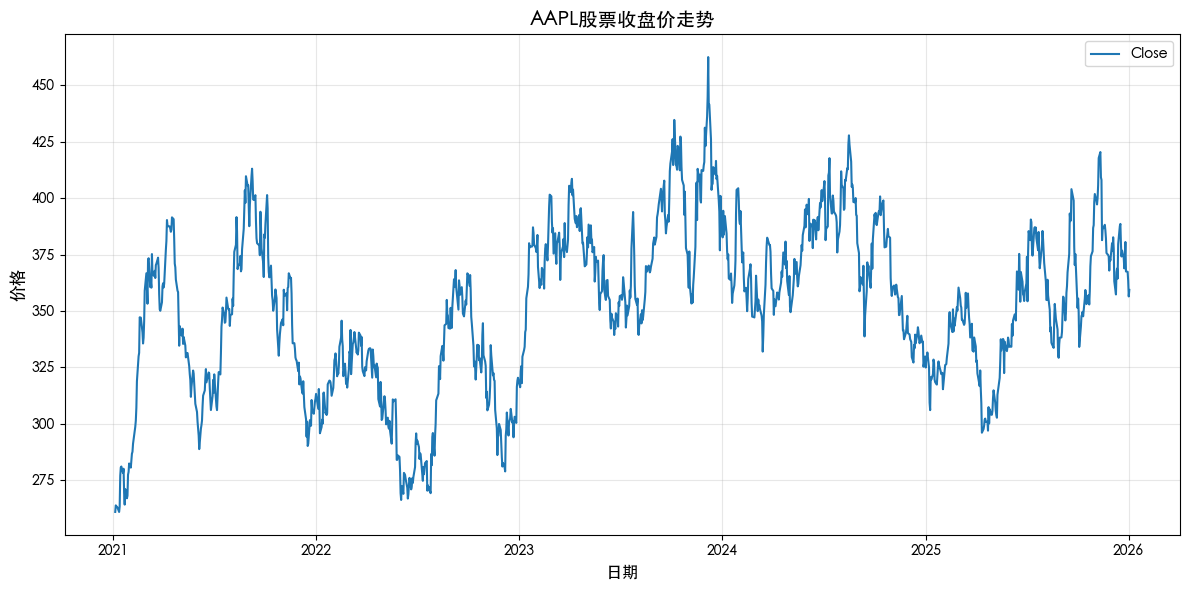

In [8]:
if 'data' in locals():
    plot_price_trend(
        data,
        column='Close',
        title=f'{ticker}股票收盘价走势',
        figsize=(12, 6)
    )

## 9. 保存数据

In [9]:
if 'data' in locals():
    from src.data_loader import save_stock_data
    
    save_file_path = os.path.join(project_dir, 'data', f'{ticker}_stock_data_cleaned.csv')
    save_stock_data(data, save_file_path)
    print("数据已保存！")

数据已保存至: /Users/fang/Documents/Code/python-demo/stock-analysis/data/AAPL_stock_data_cleaned.csv
数据已保存！


## 10. 总结

本notebook完成了以下任务：
1. ✓ 导入必要的库
2. ✓ 检查数据文件
3. ✓ 加载股票数据
4. ✓ 验证数据完整性
5. ✓ 清理数据
6. ✓ 计算基本统计信息
7. ✓ 计算日收益率
8. ✓ 可视化价格走势
9. ✓ 保存清理后的数据

**注意**: 由于Yahoo Finance API限流，本notebook使用示例数据。如需下载真实数据，请稍后重试或使用其他数据源。

下一步：在下一个notebook中学习技术指标的计算。